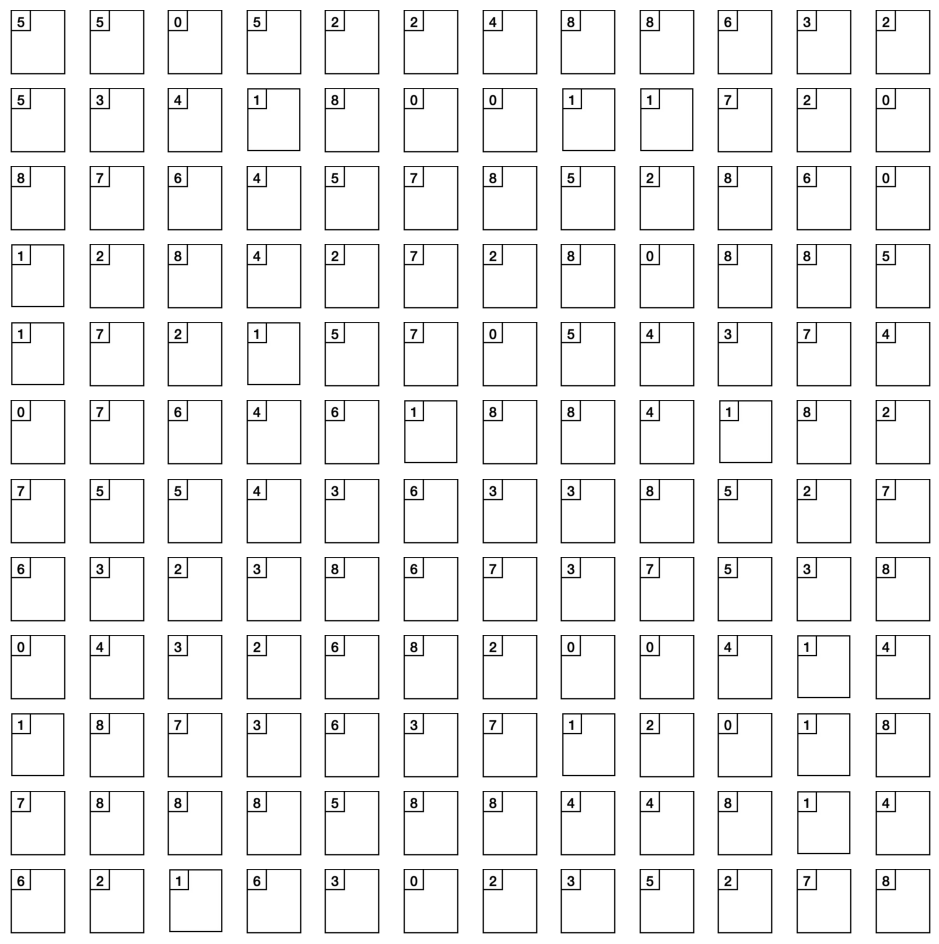

In [152]:
# Load 144 random images with replacement from the set 'box0.jpg', 'box1.jpg', ..., 'box9.jpg'.
# Then, display the images in a 12x12 grid, and save the grid as 'montage.png'.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Load 144 random images with replacement from the set 'box0.jpg', 'box1.jpg', ..., 'box9.jpg' in the folder
# 'handDigits' and store them in a list.
images = []
for i in range(144):
    images.append(mpimg.imread('handDigits/box' + str(random.randint(0, 9)) + '.jpg'))

# Create a 12x12 grid of subplots.
fig, axs = plt.subplots(12, 12, figsize=(12, 12))

# Display the images in the grid.
for i in range(12):
    for j in range(12):
        axs[i, j].imshow(images[i * 12 + j])
        axs[i, j].axis('off')

# Save the grid
plt.savefig('handDigits/handDigitSheet.png')
plt.show()


In [155]:
# Load image 'handDigits/scannedSheet.pdf,' with a single page,
# then convert it to a 2D NumPy array with high resolution
# and then display the image.
import fitz
doc = fitz.open('handDigits/scannedSheetMultiPage.pdf')
nPages = doc.page_count
imgSet = []
for iPage in range(nPages):
    print(f'Opening page {iPage}')
    page = doc.load_page(iPage)
    pix = page.get_pixmap(matrix=fitz.Matrix(3, 3))
    img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width, pix.n)
    # rotate the image 90 degrees to the left
    img = np.rot90(img,3)
    imgSet.append(img)
    


Opening page 0
Opening page 1
Opening page 2
Opening page 3
Opening page 4
Opening page 5
Opening page 6
Opening page 7
Opening page 8
Opening page 9
Opening page 10
Opening page 11
Opening page 12
Opening page 13
Opening page 14
Opening page 15
Opening page 16
Opening page 17
Opening page 18
Opening page 19
Opening page 20
Opening page 21
Opening page 22
Opening page 23
Opening page 24


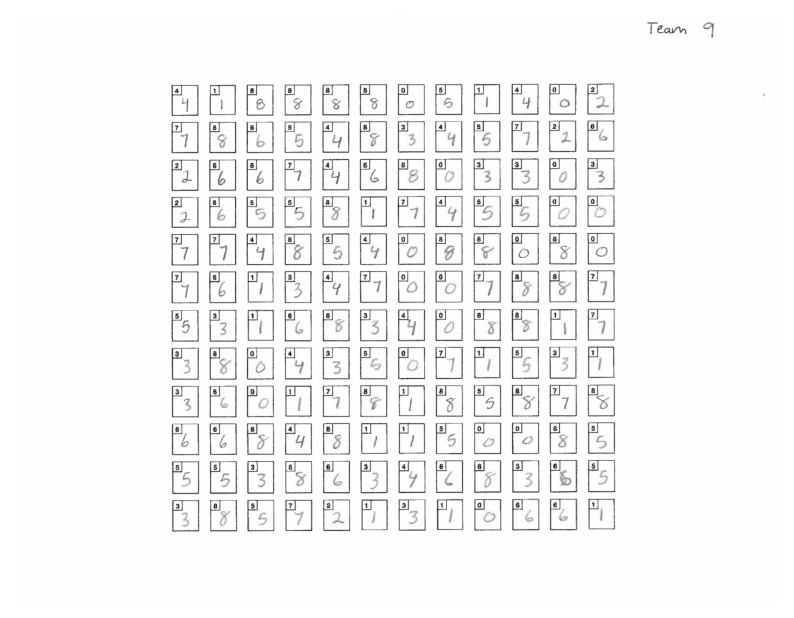

In [156]:
# Show one of the images.
plt.figure(figsize=(10, 10))
plt.imshow(imgSet[0])
plt.axis('off')
plt.show()


In [157]:
# Record the labels for the first page.
labelPage = [4,1,8,8,8,8,0,5,1,4,0,2,
          7,8,6,5,4,8,3,4,5,7,2,6,
          2,6,6,7,4,6,8,0,3,3,0,3,
          2,6,5,5,8,1,7,4,5,5,0,0,
          7,7,4,8,5,4,0,8,8,0,8,0,
          7,6,1,3,4,7,0,0,7,8,8,7,
          5,3,1,6,8,3,4,0,8,8,1,7,
          3,8,0,4,3,5,0,7,1,5,3,1,
          3,6,0,1,7,8,1,8,5,8,7,8,
          6,6,8,4,8,1,1,5,0,0,8,5,
          5,5,3,8,6,3,4,6,8,3,6,5,
          3,8,5,7,2,1,3,1,0,6,6,1]
# labels = [0,7,7,2,6,5,0,5,1,5,8,7, 
#           1,1,8,3,4,5,0,8,5,8,6,1,
#           5,8,0,8,3,5,8,0,7,3,7,6,
#           0,3,8,6,6,1,0,5,7,5,4,0,
#           0,0,8,7,4,1,2,1,1,7,2,7,
#           0,7,8,5,1,7,2,7,8,8,6,3,
#           0,5,4,1,7,2,0,1,7,8,2,2,
#           2,1,0,0,8,5,3,3,0,3,1,5,
#           2,8,8,8,0,1,8,8,8,4,4,4,
#           0,8,1,8,1,8,4,5,4,4,0,0,
#           4,7,8,7,6,8,0,8,8,8,2,2,
#           8,0,7,6,8,0,7,2,1,8,1,6]

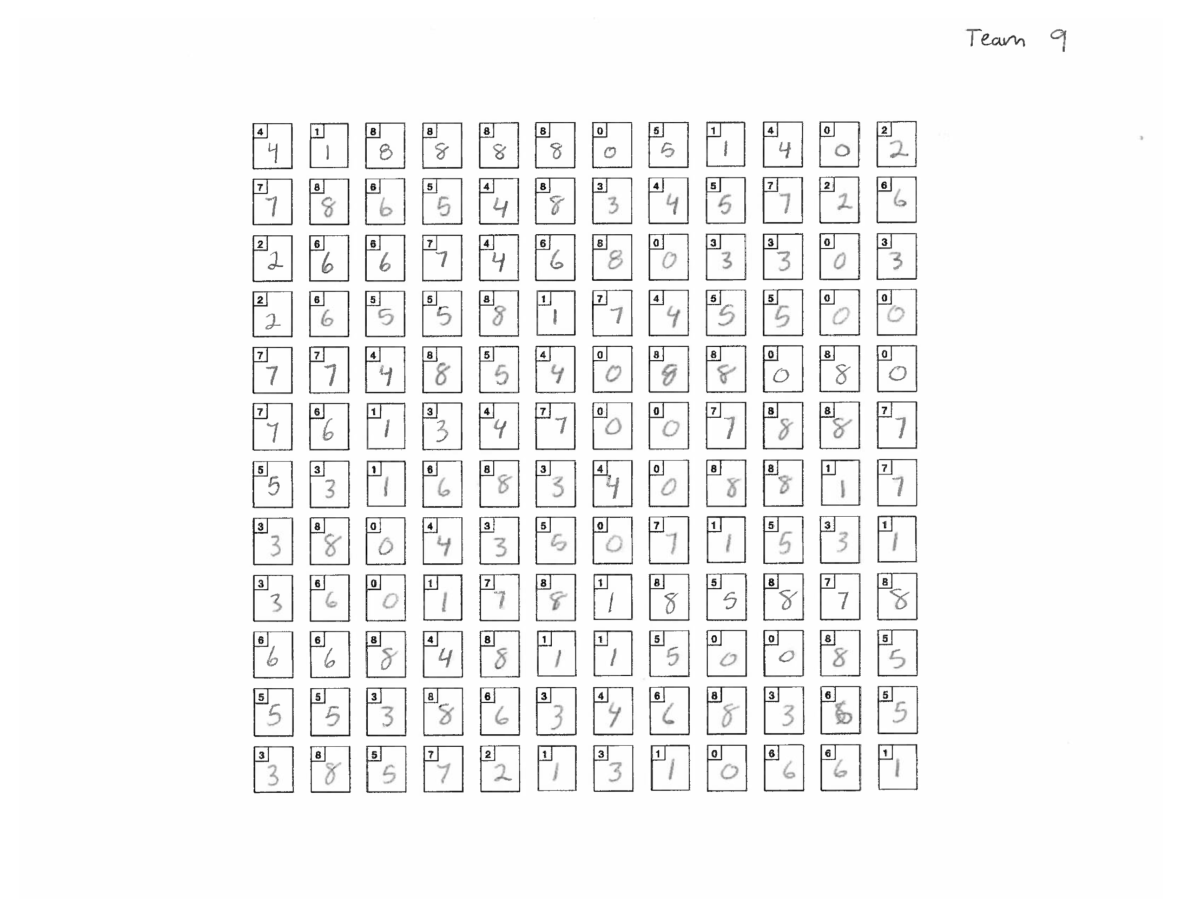

In [158]:
# Convert the image to a grayscale image and display it.
gray_img = np.mean(imgSet[0], axis=2)
plt.figure(figsize=(15, 15))
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

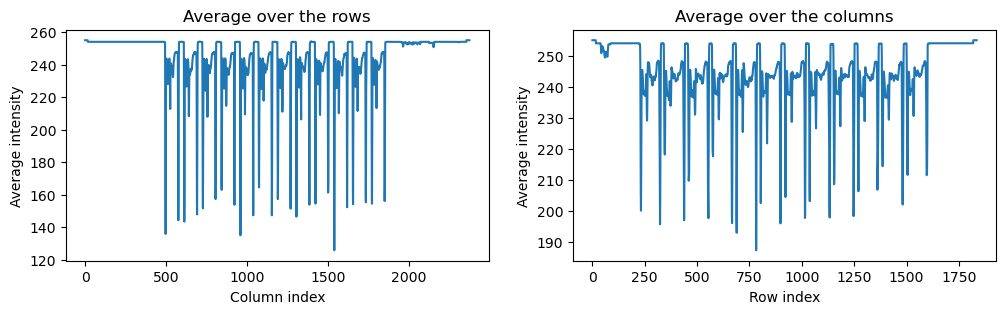

In [159]:
# Average the grayscale image over the rows and display the resulting 1D NumPy array.
gray_img = np.mean(imgSet[0], axis=2)
average_Row = np.mean(gray_img, axis=0)
average_Column = np.mean(gray_img, axis=1)

# Create two subplots, one for the average over the rows and one for the average over the columns.
fig, axs = plt.subplots(1, 2, figsize=(12,3))
axs[0].plot(average_Row)
axs[0].set_title('Average over the rows')
axs[0].set_xlabel('Column index')
axs[0].set_ylabel('Average intensity')
axs[1].plot(average_Column)
axs[1].set_title('Average over the columns')
axs[1].set_xlabel('Row index')
axs[1].set_ylabel('Average intensity')
plt.show()



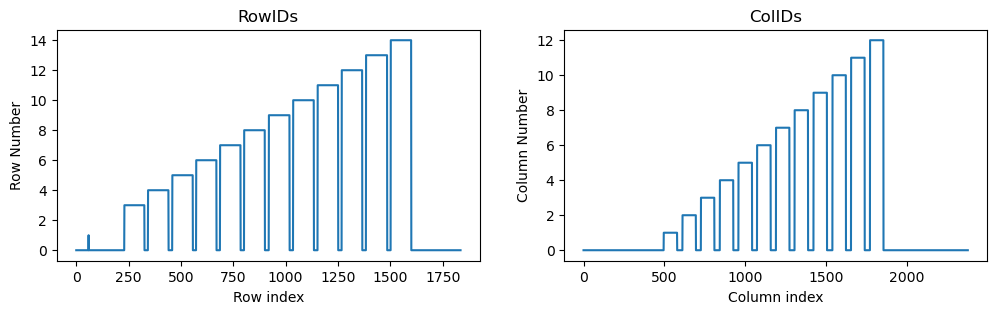

In [160]:
colIDs = np.zeros_like(average_Row)
rowNumber = 0
for i in range(1, len(average_Row)-1):
    if average_Row[i] > 250:
        colIDs[i] = 0
    elif average_Row[i-1] > 250:
        rowNumber += 1
        colIDs[i] = 0
    elif average_Row[i+1] > 250:
        colIDs[i] = 0
    else:
        colIDs[i] = rowNumber

rowIDs = np.zeros_like(average_Column)
colNumber = 0
for i in range(1, len(average_Column)-1):
    if average_Column[i] > 250:
        rowIDs[i] = 0
    elif average_Column[i-1] > 250:
        colNumber += 1
        rowIDs[i] = 0
    elif average_Column[i+1] > 250:
        rowIDs[i] = 0    
    else:
        rowIDs[i] = colNumber

# Create two subplots, one for the RowIDs and one for the ColIDs.
fig, axs = plt.subplots(1, 2, figsize=(12,3))
axs[0].plot(rowIDs)
axs[0].set_title('RowIDs')
axs[0].set_xlabel('Row index')
axs[0].set_ylabel('Row Number')
axs[1].plot(colIDs)
axs[1].set_title('ColIDs')
axs[1].set_xlabel('Column index')
axs[1].set_ylabel('Column Number')
plt.show()

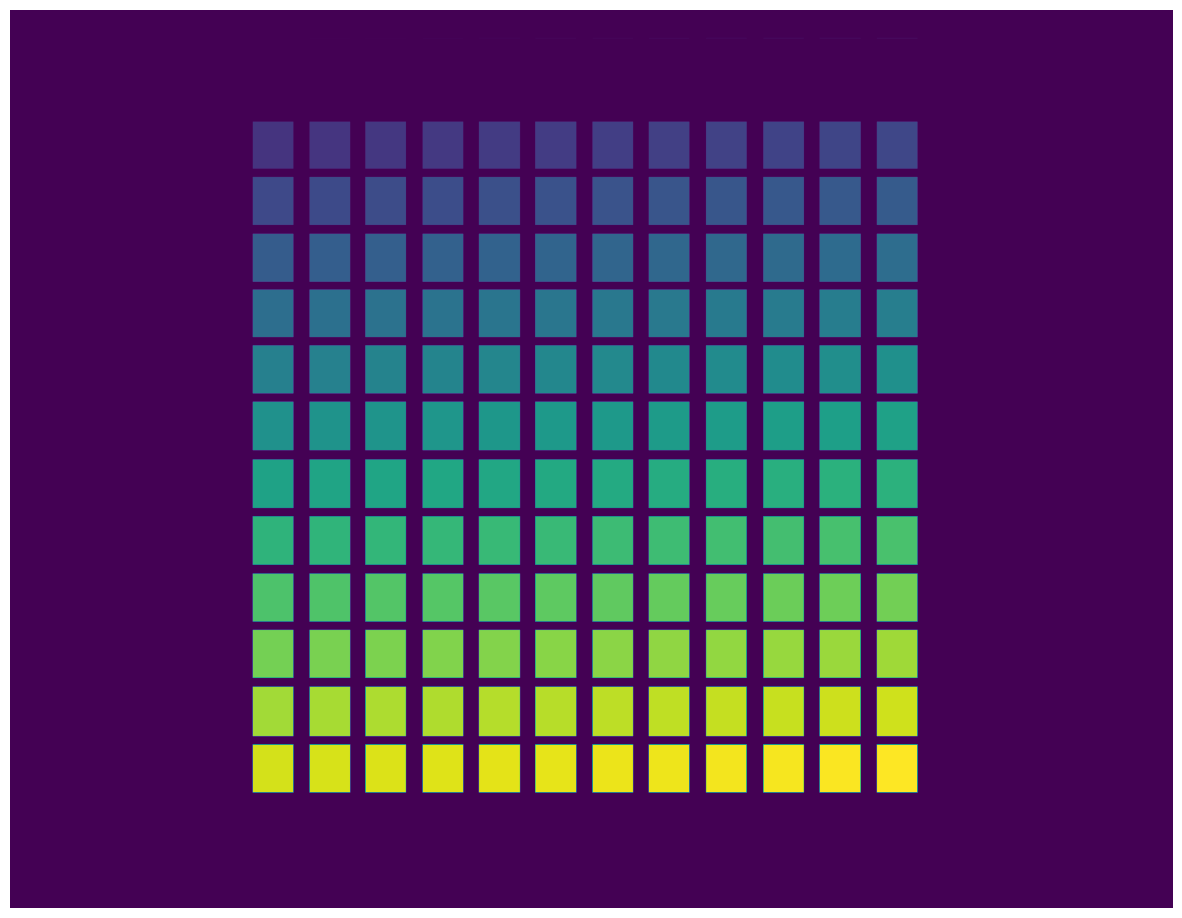

In [161]:
# Create a numpy array of the same size as the grayscale image, but where the value of each entry is 
# 12*rowID + colID, where rowID and colID are the row and column IDs of the corresponding entry in the
# grayscale image.
mask = np.zeros_like(gray_img).astype(int)
for i in range(1, len(average_Column)):
    for j in range(1, len(average_Row)):
        if rowIDs[i]>0 and colIDs[j]>0:
            mask[i][j] = 12*(rowIDs[i]-1) + colIDs[j] 

# Display the mask.
plt.figure(figsize=(15, 15))
plt.imshow(mask)
plt.axis('off')
plt.show()

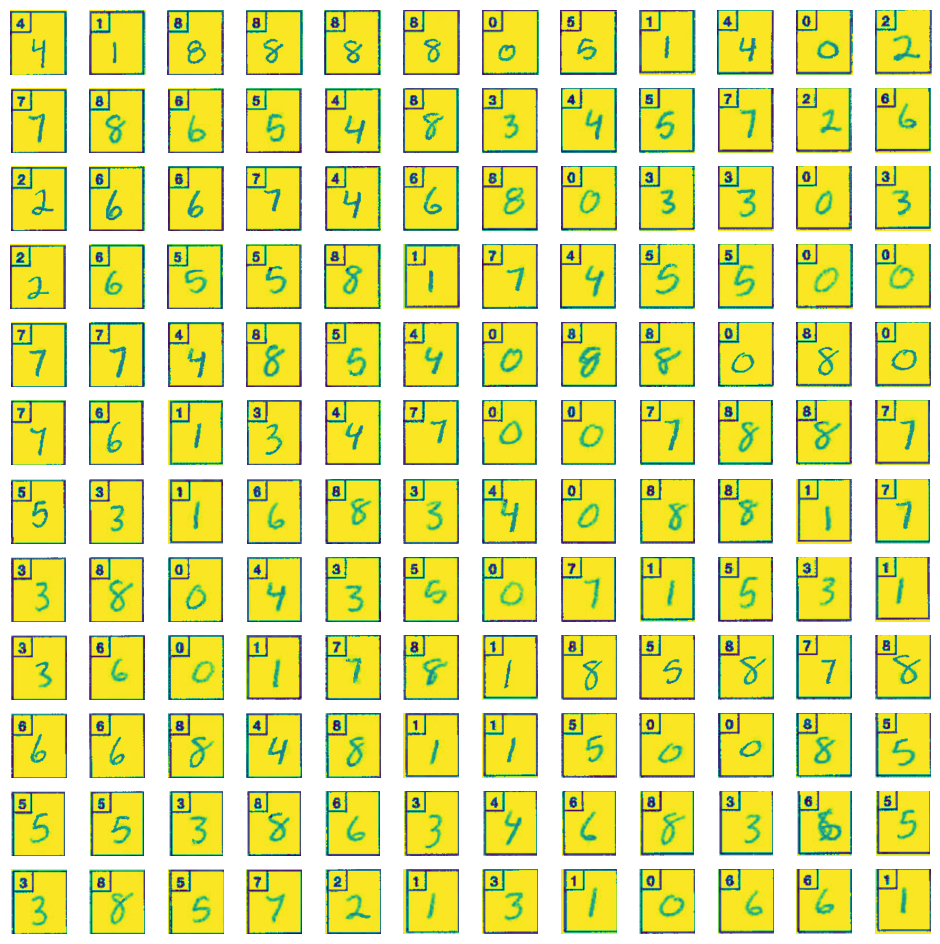

In [163]:
# Loop through the mask and create a subimage from the grayscale image for each unique value in the mask.
# Then, display the subimages in a 12x12 grid.
subImages = []
row = []
col = []

for i in range(1,np.max(mask)+1):
    row.append(np.any(mask==i, axis=1))
    col.append(np.any(mask==i, axis=0))

for i in range(1,np.max(mask)+1):
    if np.sum(mask==i)>2000:
        rmin, rmax = np.where(row[i-1])[0][[0, -1]]
        cmin, cmax = np.where(col[i-1])[0][[0, -1]]
        subImages.append(gray_img[rmin:rmax, cmin:cmax])

fig, axs = plt.subplots(12, 12, figsize=(12, 12))
for i in range(12):
    for j in range(12):
        axs[i, j].imshow(subImages[i * 12 + j])
        axs[i, j].axis('off')
plt.show()

In [164]:
# Create a function to redo the above steps for a given page of the PDF.
def process_page(img):
    # Convert the image to a grayscale image and display it.
    gray_img = np.mean(img, axis=2)

    # # Average the grayscale image over the rows and display the resulting 1D NumPy array.
    average_Row = np.mean(gray_img, axis=0)
    average_Column = np.mean(gray_img, axis=1)

    colIDs = np.zeros_like(average_Row)
    rowNumber = 0
    for i in range(1, len(average_Row)-1):
        if average_Row[i] > 250:
            colIDs[i] = 0
        elif average_Row[i-1] > 250:
            rowNumber += 1
            colIDs[i] = 0
        elif average_Row[i+1] > 250:
            colIDs[i] = 0
        else:
            colIDs[i] = rowNumber

    rowIDs = np.zeros_like(average_Column)
    colNumber = 0
    for i in range(1, len(average_Column)-1):
        if average_Column[i] > 250:
            rowIDs[i] = 0
        elif average_Column[i-1] > 250:
            colNumber += 1
            rowIDs[i] = 0
        elif average_Column[i+1] > 250:
            rowIDs[i] = 0    
        else:
            rowIDs[i] = colNumber

    mask = np.zeros_like(gray_img).astype(int)
    for i in range(1, len(average_Column)):
        for j in range(1, len(average_Row)):
            if rowIDs[i]>0 and colIDs[j]>0:
                mask[i][j] = 12*(rowIDs[i]-1) + colIDs[j]    

    subIms = []
    for i in range(1,np.max(mask)+1):
        # Apply threshold on image size to remove stubs.
        if np.sum(mask==i)>2000:
            row = np.any(mask==i, axis=1)
            col = np.any(mask==i, axis=0)
 
            rmin, rmax = np.where(row)[0][[0, -1]]
            cmin, cmax = np.where(col)[0][[0, -1]]
            subIms.append(gray_img[rmin:rmax, cmin:cmax])

    return subIms     

In [165]:
# Process app pages of the PDF collect the subimages.
subImages = []
i =0
labels = []
for page in imgSet[:4]:
    try:
        subImages.extend(process_page(page))
        print(f'Processed page {i}')
        labels = labels + labelPage
    except:
        print(f'Error processing image {i}')
    i+=1 

print(f'total number of subimages: {len(subImages)}')

Processed page 0
Processed page 1
Processed page 2
Processed page 3
total number of subimages: 576


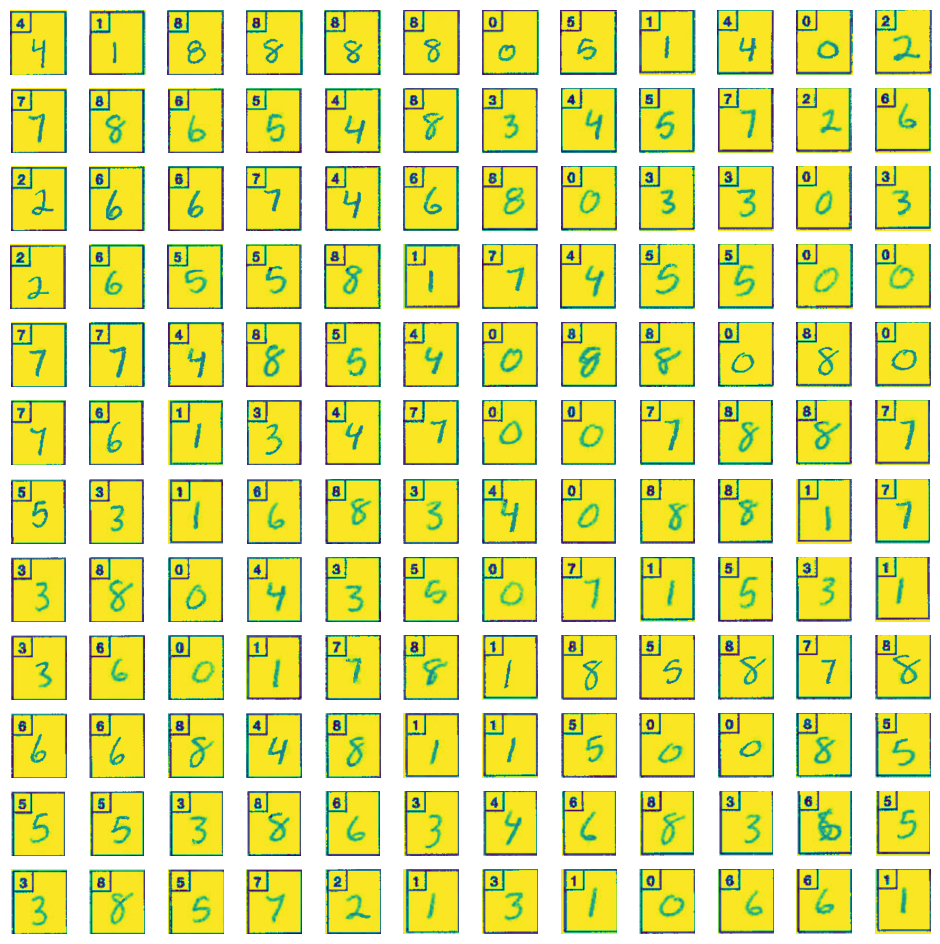

In [166]:
# Show a random 12x12 sample of the subimages.
fig, axs = plt.subplots(12, 12, figsize=(12, 12))
for i in range(12):
    for j in range(12):
        axs[i, j].imshow(subImages[i * 12 + j])
        axs[i, j].axis('off')
plt.show()


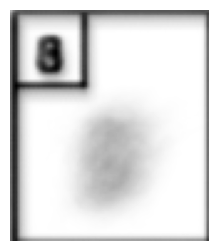

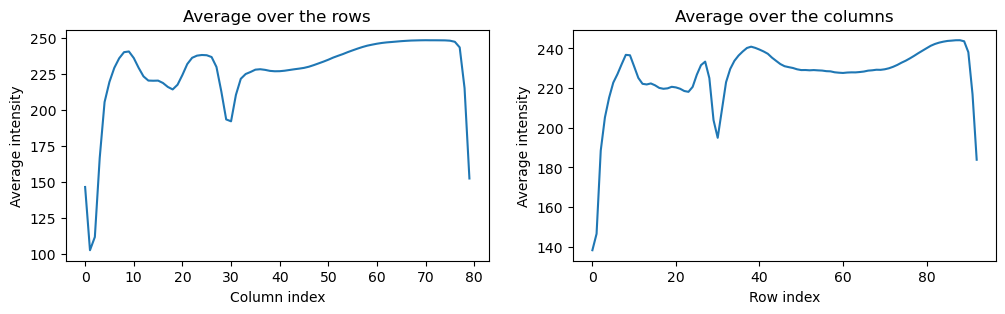

In [167]:
# Loop over the subimages and find the minimum width and height of the subimages.
minWidth = subImages[0].shape[1]
minHeight = subImages[0].shape[0]
for i in range(len(subImages)):
    if subImages[i].shape[1] < minWidth:
        minWidth = subImages[i].shape[1]
    if subImages[i].shape[0] < minHeight:
        minHeight = subImages[i].shape[0]
        
# Create an average image by averaging the subimages. Truncate each subimage to the minimum width and height
# before averaging.
averageImage = np.zeros((minHeight, minWidth))
for i in range(len(subImages)):
    averageImage += subImages[i][:minHeight, :minWidth]
averageImage /= len(subImages)

# Display the average image.
plt.figure(figsize=(3, 3))
plt.imshow(averageImage, cmap='gray')
plt.axis('off')
plt.show()

# Compute the row and column averages of the average image and display the resulting 1D NumPy arrays.
average_Row = np.mean(averageImage, axis=0)
average_Column = np.mean(averageImage, axis=1)

# Create two subplots, one for the average over the rows and one for the average over the columns.
fig, axs = plt.subplots(1, 2, figsize=(12,3))
axs[0].plot(average_Row)
axs[0].set_title('Average over the rows')
axs[0].set_xlabel('Column index')
axs[0].set_ylabel('Average intensity')
axs[1].plot(average_Column)
axs[1].set_title('Average over the columns')
axs[1].set_xlabel('Row index')
axs[1].set_ylabel('Average intensity')
plt.show()


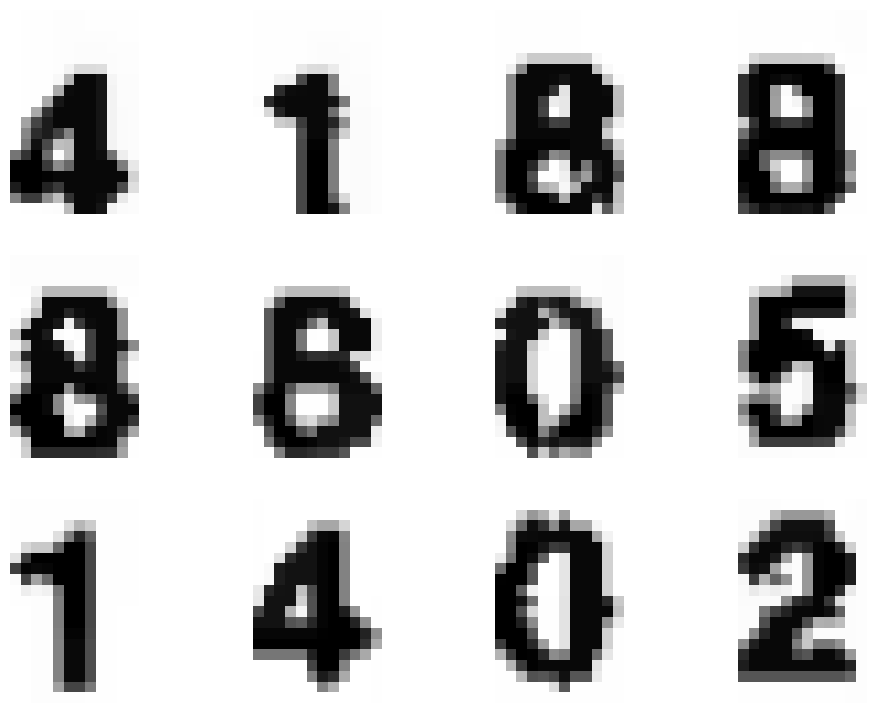

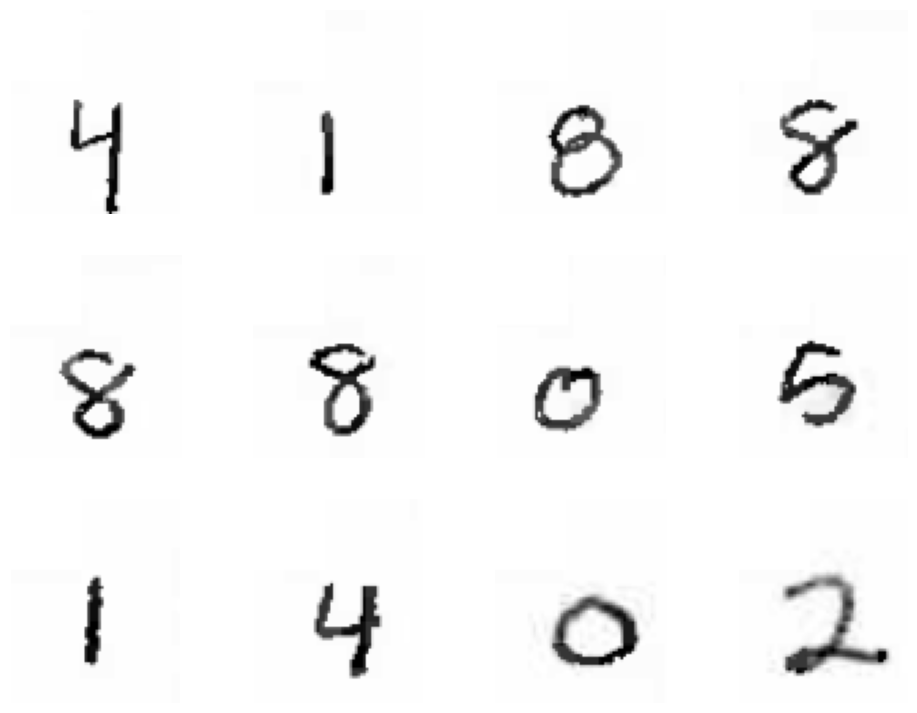

Subimage: 576
Label List: 576
Typed List: 576
Drawing List: 576


In [168]:
# For each subimage in the typeLabeled data, split into two new images.  
# The first will be the top left 11x11 box, and the second will be the original image with the top left 11x11 box removed.
labelList = []
typedList = []
drawingList = []

for i in range(len(subImages)):
    for j in range(0, 1):
        for k in range(0, 1):       
            labImage = subImages[i][8+j:27+j, 10+k:22+k]

            typedList.append(labImage)
    
            img = subImages[i].copy()

            img[0:36, 0:36] = 255
            # crop the image to remove the first two rows and columns
            img = img[10+j:-10+j, 10+k:-10+k]

            drawingList.append(img)

            if i<len(labels):
                labelList.append(labels[i])

# Randomly shuffle the label and drawing lists using the same random seed.
# inds = list(range(len(labelList)))
# random.shuffle(inds)
# labelList = [labelList[i] for i in inds]
# typedList = [typedList[i] for i in inds]
# drawingList = [drawingList[i] for i in inds]

# Display the first 12 images in the label list in a 3x4 grid.
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for i in range(3):
    for j in range(4):
        axs[i, j].imshow(typedList[(i * 4 + j)], cmap='gray')
        axs[i, j].axis('off')
plt.show()

# Display the first 12 images in the drawing list in a 3x4 grid.
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for i in range(3):
    for j in range(4):
        axs[i, j].imshow(drawingList[(i * 4 + j)], cmap='gray')
        axs[i, j].axis('off')
plt.show()

# Display shape of data
print(f'Subimage: {len(subImages)}')
print(f'Label List: {len(labelList)}')
print(f'Typed List: {len(typedList)}')
print(f'Drawing List: {len(drawingList)}')


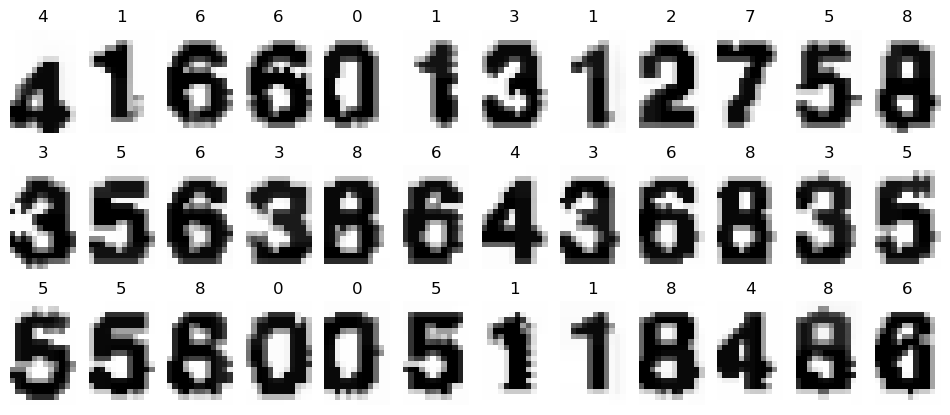

In [169]:
# Loop through the label list and create a matrix where each row is the flattened version of the corresponding image in the label list.
typedMatrix = np.zeros((len(typedList),len(typedList[0].flatten())))
for i in range(len(typedList)):
    typedMatrix[i] = typedList[i].flatten()

# Display the first 36 images in the label list in a 3x12 grid, with the corresponding label as the title.
fig, axs = plt.subplots(3, 12, figsize=(12, 5))
for i in range(3):
    for j in range(12):
        axs[i, j].imshow(typedList[-(i * 12 + j)], cmap='gray')
        axs[i, j].set_title(labelList[-(i * 12 + j)])
        axs[i, j].axis('off')


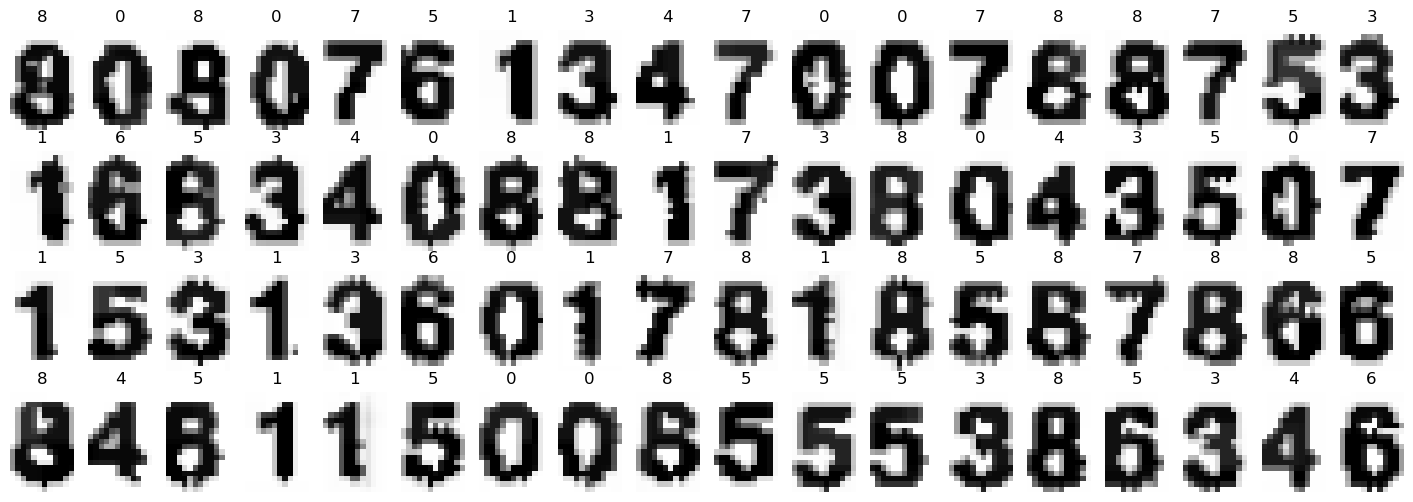

Accuracy: 0.773936170212766
Accuracy: 0.8524305555555556


In [170]:
# Associate the labelMatrix with the labels list, and build a classifier using the first 120 images in the label list.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
nTrain = 200
classifier.fit(typedMatrix[:nTrain], labelList[:nTrain])

# Use the classifier to predict the labels of the last 24 images in the label list.
predictedLabels = classifier.predict(typedMatrix)

# Display the last 24 images in the drawing list in a 4x12 grid, with the predicted labels as titles.
fig, axs = plt.subplots(4, 18, figsize=(18, 6))
for i in range(4):
    for j in range(18):
        axs[i, j].imshow(typedList[(i * 18 + j) + nTrain], cmap='gray')
        axs[i, j].set_title(predictedLabels[(i * 18 + j) + nTrain])
        axs[i, j].axis('off')
plt.show()

print('Accuracy:', np.mean(predictedLabels[nTrain:len(labelList)] == labelList[nTrain:]))
print('Accuracy:', np.mean(predictedLabels == labelList))


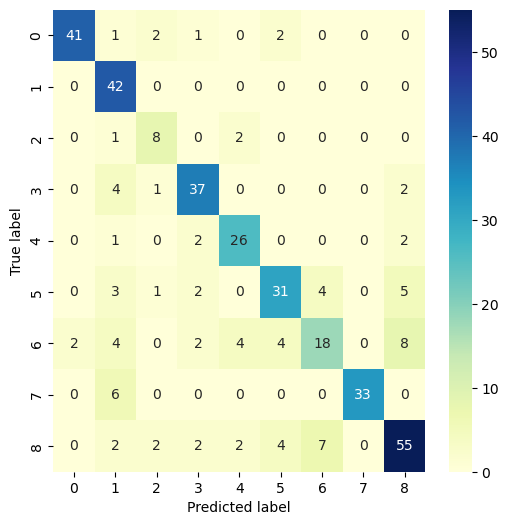

In [171]:
# Create a confusion matrix for the classifier on the predicted labels.
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(labelList[nTrain:], predictedLabels[nTrain:])

# Display the confusion matrix as a heatmap.
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(confusionMatrix, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# Digit Recognition using TensorFlow

In [172]:
# Simple FFNN in tensorflow

import tensorflow as tf
from sklearn.model_selection import train_test_split

In [173]:
# Lets design our architecture here
layers = [50,50,9]                        # size of each layer
activations = ['relu','relu','softmax']     # activation function for each layer
optimizer = 'adam'                          # optimizer for training
loss = tf.keras.losses.SparseCategoricalCrossentropy()  # LOSS FUNCTION
input_size = (typedList[0].shape[0], typedList[0].shape[1] )            # size of input layer

# how to implement this model, we make a blank model and then add in each layer with a
# for loop.

model = tf.keras.Sequential()

# define a set input layer, then flatten it. This way we can just pass it images,
# and it automatically flattens them.
model.add(tf.keras.layers.Input(shape=input_size))
model.add(tf.keras.layers.Flatten())

# now add the layers defined in the list above with their activations
for i in range(0, len(layers)):
  model.add(tf.keras.layers.Dense(layers[i], activation=activations[i]))

# Compile the model, this is where we add the optimizer to use and the loss and
# the evaluation metric, accuracy in this case
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'],)

#print out the description of our neural network
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 228)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                11450     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 9)                 459       
                                                                 
Total params: 14459 (56.48 KB)
Trainable params: 14459 (56.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
# fit the model with validation split
model.fit(x=np.array(typedList[:len(labelList)]), y=np.array(labelList), validation_split=0.2, epochs=40, batch_size=20)


Epoch 1/40
23/23 [==============================] - 1s 11ms/step - loss: 97.1032 - accuracy: 0.1348 - val_loss: 33.3112 - val_accuracy: 0.2241
Epoch 2/40
23/23 [==============================] - 0s 3ms/step - loss: 22.6434 - accuracy: 0.2717 - val_loss: 12.0803 - val_accuracy: 0.3103
Epoch 3/40
23/23 [==============================] - 0s 3ms/step - loss: 12.8206 - accuracy: 0.3543 - val_loss: 6.6783 - val_accuracy: 0.4828
Epoch 4/40
23/23 [==============================] - 0s 3ms/step - loss: 8.4815 - accuracy: 0.4326 - val_loss: 5.4961 - val_accuracy: 0.5259
Epoch 5/40
23/23 [==============================] - 0s 4ms/step - loss: 6.2986 - accuracy: 0.4804 - val_loss: 5.0604 - val_accuracy: 0.5603
Epoch 6/40
23/23 [==============================] - 0s 3ms/step - loss: 4.9791 - accuracy: 0.5196 - val_loss: 3.3121 - val_accuracy: 0.5862
Epoch 7/40
23/23 [==============================] - 0s 3ms/step - loss: 4.3279 - accuracy: 0.5717 - val_loss: 2.3878 - val_accuracy: 0.6810
Epoch 8/40
23/

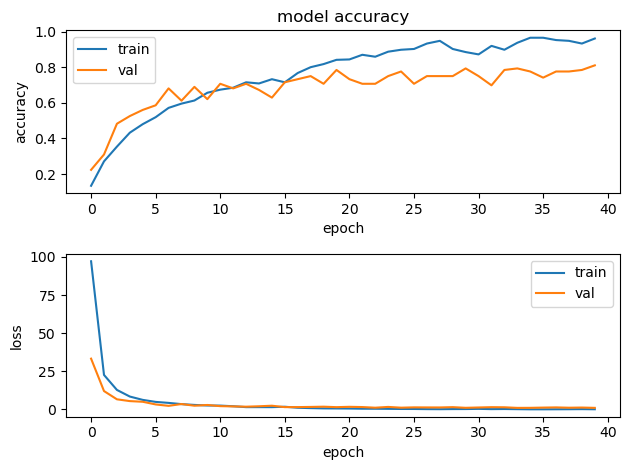

In [176]:
# plot the training metric, validation accuracy, and loss
f,ax = plt.subplots(2,1, tight_layout=True)
ax[0].plot(model.history.history['accuracy'])
ax[0].plot(model.history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'],)

ax[1].plot(model.history.history['loss'])
ax[1].plot(model.history.history['val_loss'])
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'],)
plt.show()

That was pretty good, but can we do better? Let's do some hyperparameter optimization on our batchsize, epochs, and layer sizes. The topic of hyperparameter optimization is extremely dense and can get complicated fast, for the purposes of this course we will set up a simple grid search. As you play with the grid search, think about it's limitations and maybe other better strategies to try.

In [177]:
import tqdm as tqdm

activations = ['relu','relu','softmax']     # activation function for each layer
optimizer = 'adam'                          # optimizer for training
loss = tf.keras.losses.SparseCategoricalCrossentropy()  # LOSS FUNCTION
input_size = (typedList[0].shape[0], typedList[0].shape[1] )            # size of input layer


# define our batch sizes to search over:
batch_sizes = [16,32]

# define our epochs to search over:
epochs = [20,50]

# define our layer architechtures to search over:
# WARNING, LAST LAYER MUST BE 9 AND MATCH THE NUMBER OF ACTIVATIONS DEFINED ABOVE
layer_sizes = [[50,50,9],[256,64,9]]

# define a function to create our FFNN models for any layer organization
def create_model(layers,):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=input_size))
  model.add(tf.keras.layers.Flatten())
  # now add the layers defined in the list above with their activations
  for i in range(0, len(layers)):
    model.add(tf.keras.layers.Dense(layers[i], activation=activations[i]))
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
  return model

iterations = 3 # how many times to run each model, we will average their validation accuracy

search_space_size = len(batch_sizes) * len(epochs) * len(layer_sizes) * iterations
print('WARNING: Searching %i possibilities, this may take a while...'%search_space_size)

validation_accuracy_grid = np.zeros([iterations, len(batch_sizes), len(epochs), len(layer_sizes)])
labels = []
with tqdm.tqdm(total=search_space_size) as pbar:
  for i in range(0, iterations):
    for j in range(0, len(batch_sizes)):
      for k in range(0, len(epochs)):
        for l in range(0, len(layer_sizes)):
          m = create_model(layer_sizes[l])
          m.fit(x=np.array(typedList[:len(labelList)]), y=np.array(labelList), validation_split=0.2,
                epochs=epochs[k], batch_size=batch_sizes[j], verbose=False,)
          validation_accuracy_grid[i,j,k,l] = m.history.history['val_accuracy'][-1]
          labels.append('batch_size=%s, epochs=%s, layers=%s'%(str(batch_sizes[j]), str(epochs[k]), str(layer_sizes[l])))
          pbar.update(1)




100%|██████████| 24/24 [01:04<00:00,  2.71s/it]


In [178]:
#print the best average validation accuracy
np.mean(validation_accuracy_grid,axis=0).max()

0.9339080452919006

/var/folders/gs/29wgt2xj1jj873ytknj55rsr0000gp/T/ipykernel_55135/1989549777.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


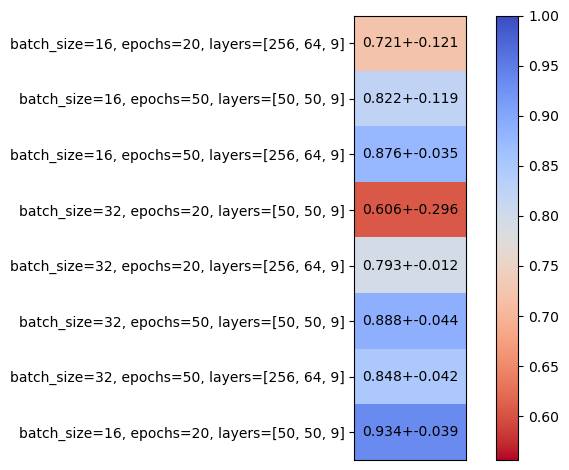

In [179]:
#Plot the results of our grid search
import matplotlib.colors as colors
d = np.expand_dims(np.mean(validation_accuracy_grid,axis=0).flatten(), 0).T
d_std = np.expand_dims(np.std(validation_accuracy_grid,axis=0).flatten(), 0).T
f,ax = plt.subplots(1,1, tight_layout=True)
m = ax.matshow(d, cmap='coolwarm_r', norm=colors.Normalize(vmin=np.max(np.min(d-.05),0), vmax=1), aspect=.5)
for (i, j), z in np.ndenumerate(d):
    ax.text(j, i, '{:0.3f}'.format(z) + '+-' + '{:0.3f}'.format(d_std[i,j]), ha='center', va='center')
f.colorbar(m, ax=ax)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels(labels)
x=1